In [165]:
import pandas as pd
import numpy as np
import seaborn as sns

In [166]:
inputdir = "../../data/derived/"

In [167]:
#Import the data
data17 = pd.read_csv(inputdir + "chfs2017data.csv")
data15 = pd.read_csv(inputdir + "chfs2015data.csv")
data13 = pd.read_csv(inputdir + "chfs2013data.csv")
data11 = pd.read_csv(inputdir + "chfs2011data.csv")

In [168]:
data17.head()

,hhid,hhid_2011,hhid_2013,hhid_2015,hhid_2017,distance,stock_account_cash_balance,stock_account_cash_balance_scope,stock_numbers,stock_values,...,married,stock_account,health,own_house,happiness,rural_household_registration,credit_constraints,financial_literacy,risk_preference,business_insurances
0,2017000001,.,.,.,2017000001,1,NaN,NaN,NaN,NaN,...,1,0.0,3.0,1,1.0,1,0,1.0,1.0,0.0
1,2017000001,.,.,.,2017000001,1,NaN,NaN,NaN,NaN,...,1,0.0,3.0,1,1.0,1,0,1.0,1.0,0.0
2,2013013417,.,2013013417,2015018254,2017000002,NaN,NaN,NaN,NaN,NaN,...,0,0.0,2.0,1,0.0,0,0,NaN,NaN,0.0
3,2013013417,.,2013013417,2015018254,2017000002,NaN,NaN,NaN,NaN,NaN,...,1,0.0,1.0,1,0.0,0,0,NaN,NaN,0.0
4,2013013417,.,2013013417,2015018254,2017000002,NaN,NaN,NaN,NaN,NaN,...,1,0.0,2.0,1,0.0,0,0,NaN,NaN,0.0


# Data cleaning

<AxesSubplot:>

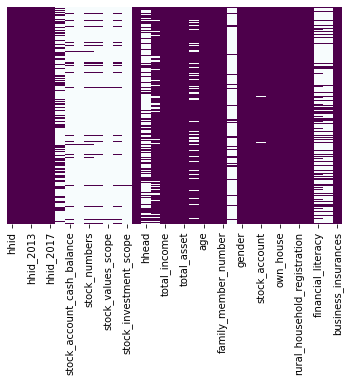

In [169]:
#Data visualization for the missing values
sns.heatmap(data17.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [170]:
data17.isna().sum()

hhid                                     0
hhid_2011                                0
hhid_2013                                0
hhid_2015                                0
hhid_2017                                0
distance                             82002
stock_account_cash_balance          117596
stock_account_cash_balance_scope    125547
stock_numbers                       117596
stock_values                        120378
stock_values_scope                  126087
stock_investment                    120378
stock_investment_scope              126351
pline                                    0
hhead                                87001
education_level                      17948
total_income                             0
total_consump                            0
total_asset                              0
total_debt                           18867
age                                     47
age2                                    47
family_member_number                    11
siblings   

In [171]:
#Delete unneeded variables
del data17["stock_numbers"]
del data17["stock_account_cash_balance"]
del data17["stock_account_cash_balance_scope"]
del data17["stock_values"]
del data17["stock_values_scope"]
del data17["stock_investment"]
del data17["stock_investment_scope"]

In [172]:
#Since my research question is focused on the household level, I only need one data per household.
#That is, the data of the head of the household.
data17 = data17.dropna(subset = ['hhead'])
del data17['hhead']

In [173]:
data15.head()

,hhid_2015,financial_literacy_2015,risk_preference_2015
0,2015000001,1.0,0.0
1,2015000002,3.0,2.0
2,2015000003,1.0,0.0
3,2015000004,3.0,4.0
4,2015000005,0.0,0.0


In [174]:
data13.head()

,hhid_2013,financial_literacy_2013,risk_preference_2013
0,2013000001,1.0,1.0
1,2013000002,2.0,1.0
2,2013000003,2.0,0.0
3,2013000004,3.0,0.0
4,2013000005,2.0,2.0


In [175]:
data11.head()

,hhid_2011,risk_preference_2011
0,201100001,0.0
1,201100002,0.0
2,201100003,0.0
3,201100004,0.0
4,201100005,0.0


In [176]:
data17['hhid_2015'] = np.where(data17["hhid_2015"] == ".", -1, data17["hhid_2015"])
data17['hhid_2013'] = np.where(data17["hhid_2013"] == ".", -1, data17["hhid_2013"])
data17['hhid_2011'] = np.where(data17["hhid_2011"] == ".", -1, data17["hhid_2011"])
data17['hhid_2015'] = data17['hhid_2015'].astype(int)
data17['hhid_2013'] = data17['hhid_2013'].astype(int)
data17['hhid_2011'] = data17['hhid_2011'].astype(int)

You can observe a large number of missing values in `financial_literacy` and `risk_preference` in data17 because only new respondents were interviewed in these two related questions in the 2017 survey. Therefore, I need to merge the previous data and fill in the missing values.

In [177]:
data1 = pd.merge(data17, data15, on = 'hhid_2015', how = 'outer')
data2 = pd.merge(data1, data13, on = 'hhid_2013', how = 'outer')
data = pd.merge(data2, data11, on = 'hhid_2011', how = 'outer')
#The merge method I used produces a lot of na values, remove them.
data = data.dropna(subset = ['hhid'])
#The merge method I used also produces a lot of duplicate values, so I need to remove these duplicates.
data = data.drop_duplicates(subset = ['hhid'], keep = 'first')

In [178]:
data['financial_literacy'] = np.where(data["financial_literacy"].isnull() == True, 
                                      data["financial_literacy_2015"], data["financial_literacy"])
data['financial_literacy'] = np.where(data["financial_literacy"].isnull() == True, 
                                      data["financial_literacy_2013"], data["financial_literacy"])

In [179]:
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2015"], 
                                   data["risk_preference"])
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2013"], 
                                   data["risk_preference"])
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2011"], 
                                   data["risk_preference"])

In [180]:
#Delete unneeded variables
del data["hhid_2017"]
del data["hhid_2015"]
del data["hhid_2013"]
del data["hhid_2011"]
del data["distance"]
del data["financial_literacy_2015"]
del data["financial_literacy_2013"]
del data["risk_preference_2015"]
del data["risk_preference_2013"]
del data["risk_preference_2011"]

In [181]:
data.isna().sum()

hhid                                0
pline                               0
education_level                    53
total_income                        0
total_consump                       0
total_asset                         0
total_debt                       8337
age                                11
age2                               11
family_member_number                3
siblings                        34541
gender                              1
married                             0
stock_account                      98
health                              9
own_house                           0
happiness                         458
rural_household_registration        0
credit_constraints                  0
financial_literacy                 46
risk_preference                  3692
business_insurances                 0
dtype: int64

In [182]:
education_data = data.dropna(subset = ['siblings'])

<AxesSubplot:>

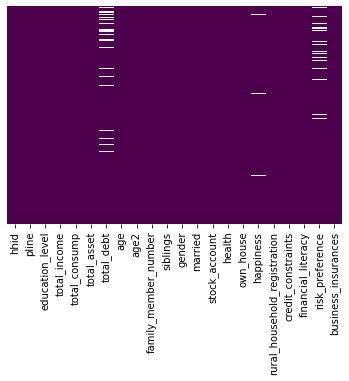

In [183]:
#Data visualization for the missing values
sns.heatmap(education_data.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [184]:
education_data.isna().sum()

hhid                              0
pline                             0
education_level                   4
total_income                      0
total_consump                     0
total_asset                       0
total_debt                      555
age                               0
age2                              0
family_member_number              0
siblings                          0
gender                            0
married                           0
stock_account                    14
health                            0
own_house                         0
happiness                        42
rural_household_registration      0
credit_constraints                0
financial_literacy                7
risk_preference                 294
business_insurances               0
dtype: int64

In [185]:
#Continue processing those missing values
education_data['education_level'] = education_data['education_level'].fillna(education_data['education_level'].median())
education_data['health'] = education_data['health'].fillna(education_data['health'].median())
education_data['family_member_number'] = education_data['family_member_number'].fillna(education_data['family_member_number'].median())
education_data['age'] = education_data['age'].fillna(education_data['age'].mean())
del education_data['age2']
education_data['age2'] = education_data['age']*education_data['age']
education_data['financial_literacy'] = education_data['financial_literacy'].fillna(education_data['financial_literacy'].median())

/var/folders/lq/10gdfgyj495gwt01brtf67740000gn/T/ipykernel_23293/307299015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_data['education_level'] = education_data['education_level'].fillna(education_data['education_level'].median())
/var/folders/lq/10gdfgyj495gwt01brtf67740000gn/T/ipykernel_23293/307299015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_data['health'] = education_data['health'].fillna(education_data['health'].median())
/var/folders/lq/10gdfgyj495gwt01brtf6774000

In [186]:
#Delete rows with too many missing values
education_data = education_data.dropna(subset = ['total_debt'])
education_data = education_data.dropna(subset = ['risk_preference'])
education_data = education_data.dropna(subset = ['happiness'])

In [187]:
education_data.isna().sum()

hhid                             0
pline                            0
education_level                  0
total_income                     0
total_consump                    0
total_asset                      0
total_debt                       0
age                              0
family_member_number             0
siblings                         0
gender                           0
married                          0
stock_account                   11
health                           0
own_house                        0
happiness                        0
rural_household_registration     0
credit_constraints               0
financial_literacy               0
risk_preference                  0
business_insurances              0
age2                             0
dtype: int64

<AxesSubplot:>

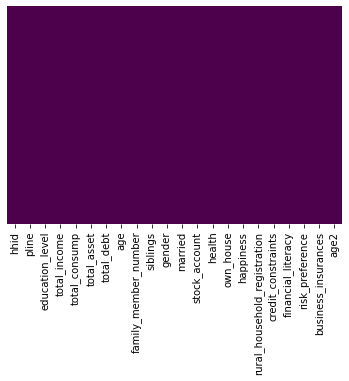

In [188]:
#All missing values have been processed
sns.heatmap(education_data.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [189]:
education_data.describe()

,hhid,pline,education_level,total_income,total_consump,total_asset,total_debt,age,family_member_number,siblings,...,stock_account,health,own_house,happiness,rural_household_registration,credit_constraints,financial_literacy,risk_preference,business_insurances,age2
count,4.634000e+03,4634.000000,4634.000000,4.634000e+03,4.634000e+03,4.634000e+03,4.634000e+03,4634.000000,4634.000000,4634.000000,...,4623.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000,4634.000000
mean,1.869375e+09,1.494389,4.877428,1.570933e+05,1.009357e+05,1.650370e+06,1.751139e+05,33.576608,3.858438,1.430298,...,0.155743,2.934398,0.859517,0.680621,0.472378,0.074881,1.317436,2.042080,0.180190,1152.835563
std,4.936445e+08,0.932234,1.877329,2.816991e+05,1.239272e+05,3.005423e+06,5.027282e+05,5.045044,1.985765,1.409779,...,0.362651,0.822474,0.347525,0.466286,0.499290,0.263228,1.093517,1.350252,0.384387,325.335048
min,2.011000e+08,1.000000,1.000000,-1.979126e+06,2.980000e+03,3.300000e+02,0.000000e+00,16.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,256.000000
25%,2.013022e+09,1.000000,3.000000,4.464050e+04,4.644500e+04,2.754175e+05,0.000000e+00,30.000000,3.000000,0.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,900.000000
50%,2.015026e+09,1.000000,5.000000,8.936650e+04,7.144250e+04,6.966175e+05,1.000000e+04,35.000000,3.000000,1.000000,...,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1225.000000
75%,2.017016e+09,2.000000,7.000000,1.721358e+05,1.145875e+05,1.735937e+06,1.507778e+05,38.000000,5.000000,2.000000,...,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1444.000000
max,2.017040e+09,10.000000,9.000000,5.040070e+06,3.365000e+06,6.394004e+07,1.690000e+07,64.000000,20.000000,10.000000,...,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,4096.000000


In [190]:
len(education_data)

4634

In [191]:
#Export data
education_data.to_csv(inputdir + 'processed_chfs_data.csv', index=False)